In [1]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np 
import glob

In [3]:
glob.glob('../data/*')

['../data/key_1.csv', '../data/sample_submission_1.csv', '../data/train_1.csv']

In [4]:
full_df = pd.read_csv('../data/train_1.csv')

In [5]:
full_df.shape #days between dates is 550 so right

(145063, 551)

In [6]:
from fbprophet import Prophet

In [27]:
df = full_df.set_index('Page').T.reset_index(); df

Page,index,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider,Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider,Hasta_el_último_hombre_es.wikipedia.org_all-access_spider,Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
0,2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-07-05,14.0,11.0,0.0,4.0,NaN,20.0,NaN,29.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-07-06,9.0,13.0,4.0,26.0,NaN,8.0,NaN,127.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2015-07-07,9.0,22.0,0.0,14.0,NaN,5.0,NaN,53.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2015-07-08,22.0,11.0,3.0,9.0,NaN,17.0,NaN,37.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015-07-09,26.0,10.0,4.0,11.0,NaN,24.0,NaN,20.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2015-07-10,24.0,4.0,4.0,16.0,NaN,7.0,NaN,32.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Columns: 145064 entries, index to Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
dtypes: float64(145063), object(1)
memory usage: 608.7+ MB


In [29]:
df = df.rename(columns={'index':'ds'})

In [30]:
df['ds'] = pd.to_datetime(df.ds)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Columns: 145064 entries, ds to Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
dtypes: datetime64[ns](1), float64(145063)
memory usage: 608.7 MB


In [39]:
testdf = df.iloc[:,:2]; testdf

Page,ds,2NE1_zh.wikipedia.org_all-access_spider
0,2015-07-01,18.0
1,2015-07-02,11.0
2,2015-07-03,5.0
3,2015-07-04,13.0
4,2015-07-05,14.0
5,2015-07-06,9.0
6,2015-07-07,9.0
7,2015-07-08,22.0
8,2015-07-09,26.0
9,2015-07-10,24.0


In [42]:
testdf = testdf.rename(columns={'2NE1_zh.wikipedia.org_all-access_spider':'y'})

In [46]:
traindf = testdf.iloc[:-60]

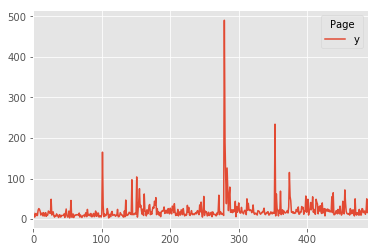

In [62]:
traindf.plot()

In [69]:
traindf.loc[traindf.y > traindf.y.quantile(.95), ['y']] = None

/Users/dbcerigo/miniconda3/envs/basePy3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


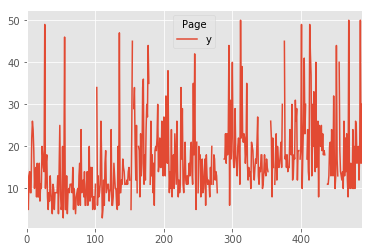

In [71]:
traindf.plot()

In [77]:
m = Prophet(yearly_seasonality=True)
m.fit(traindf)

In [78]:
tdf = m.make_future_dataframe(periods=60); tdf.tail()

,ds
545,2016-12-27
546,2016-12-28
547,2016-12-29
548,2016-12-30
549,2016-12-31


In [79]:
forecast = m.predict(tdf)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
545,2016-12-27,28.535236,19.040583,39.315860
546,2016-12-28,29.376859,19.372755,39.544122
547,2016-12-29,28.977922,18.632704,38.922166
548,2016-12-30,28.842170,18.892211,39.054896
549,2016-12-31,26.203061,16.181386,35.919164


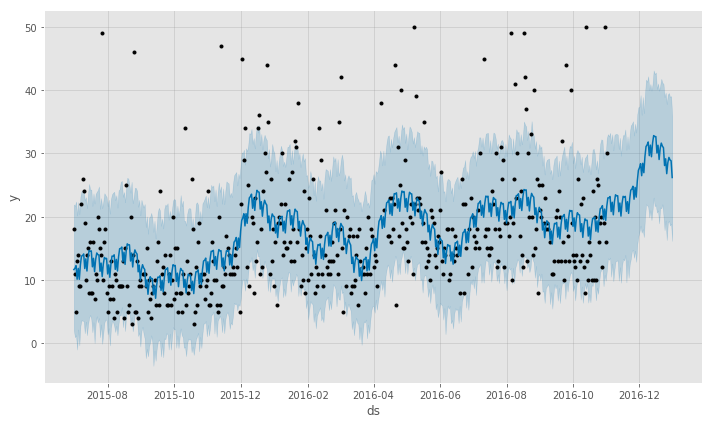

In [80]:
m.plot(forecast);

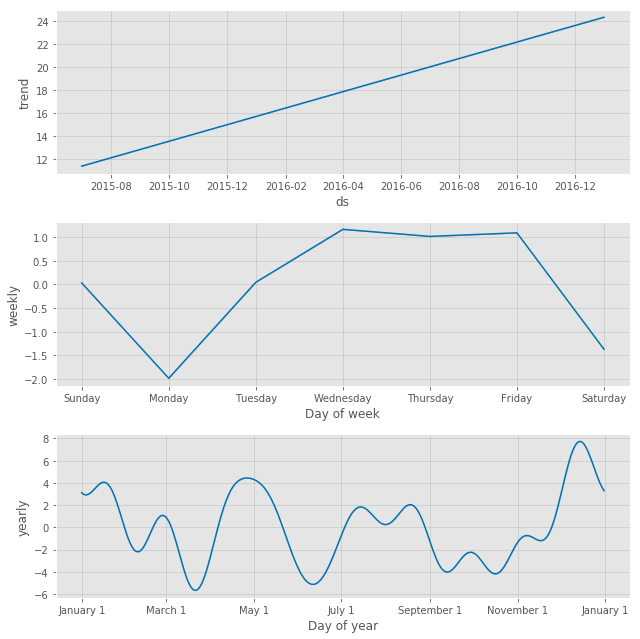

In [81]:
m.plot_components(forecast);

In [48]:
tdf = m.make_future_dataframe(periods=60); tdf.tail()

,ds
545,2016-12-27
546,2016-12-28
547,2016-12-29
548,2016-12-30
549,2016-12-31


In [58]:
forecast = m.predict(tdf)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
545,2016-12-27,24.259742,-14.126731,60.034906
546,2016-12-28,21.553965,-16.345840,59.748443
547,2016-12-29,19.931619,-17.031653,56.470195
548,2016-12-30,18.423816,-17.542284,54.622527
549,2016-12-31,23.231932,-12.298857,60.830194


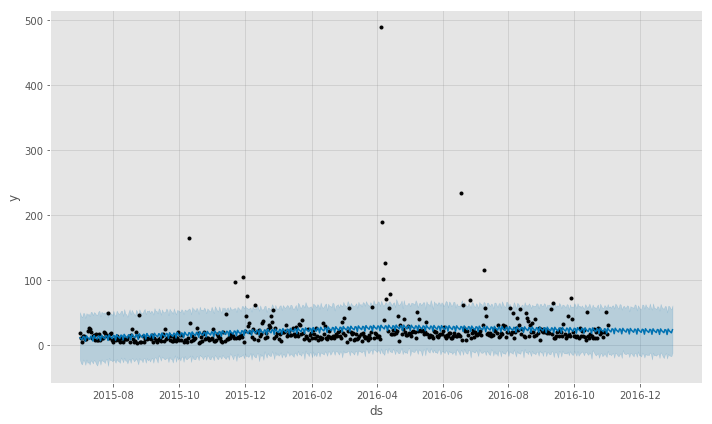

In [59]:
m.plot(forecast);

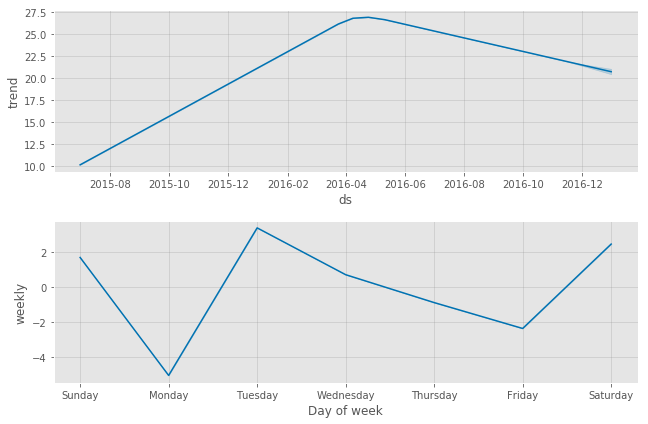

In [60]:
m.plot_components(forecast);